# 📉 t-SNE for Dimensionality Reduction on the Breast Cancer Dataset

---

## 📑 Table of Contents
1. [Introduction](#introduction)
2. [Why t-SNE Matters](#why-t-sne-matters)
3. [Intuition](#intuition)
4. [Step 1 – Load the Dataset](#step-1--load-the-dataset)
5. [Step 2 – Apply t-SNE](#step-2--apply-t-sne)
6. [Step 3 – Visualize t-SNE Results](#step-3--visualize-t-sne-results)
7. [Step 4 – Effect of Hyperparameters](#step-4--effect-of-hyperparameters)
8. [Limitations of t-SNE](#limitations-of-t-sne)
9. [Key Takeaways](#key-takeaways)
10. [How t-SNE Works (Mathematical Explanation)](#how-t-sne-works-mathematical-explanation)

---

## 📌 Introduction  
**t-SNE (t-distributed Stochastic Neighbor Embedding)** is a nonlinear dimensionality reduction method introduced by *van der Maaten & Hinton (2008)* [[paper link]](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). 

It is especially useful for **visualizing high-dimensional data** in **2D or 3D**.  

In this notebook, we apply t-SNE to the **Breast Cancer Wisconsin dataset**, which contains **30 features** extracted from digitized images of cell nuclei.  
Our goal: separate **malignant vs. benign tumors** in a 2D visualization.

---

## 🚀 Why t-SNE Matters
- Captures **nonlinear relationships** in the data.  
- Produces **clear visual clusters**.  
- Often outperforms linear methods like PCA for visualization.  

---

## 🧠 Intuition
Think of t-SNE as asking:  

**“Who are my close friends in high dimensions, and how can I keep them close in 2D?”**  

1. In high dimensions, compute **similarities between points** using **Gaussian distributions**.  
2. In low dimensions (2D/3D), map the points using a **Student-t distribution**.  
3. Optimize so that **friendships (neighbors)** are preserved as much as possible.  

👉 Result: Data points that belong together in high dimensions form **tight clusters in 2D**.

---

## 📝 Step 1 – Load the Dataset

We use the **Breast Cancer dataset** from `scikit-learn`.  

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of data:", X.shape)
print("Shape of labels:", y.shape)

Shape of data: (569, 30)
Shape of labels: (569,)


## 📝 Step 2 – Apply t-SNE

We reduce the 30-dimensional dataset into **2D embeddings**.  

In [2]:
from sklearn.manifold import TSNE

# Reduce to 2D for visualization
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

print("t-SNE transformed shape:", X_tsne.shape)

t-SNE transformed shape: (569, 2)


## 🎨 Step 3 – Visualize t-SNE Results

Each point represents a patient sample.  
- **Red (0): malignant tumor**  
- **Blue (1): benign tumor**  

Clusters indicate that **t-SNE can separate cancerous vs. non-cancerous cases** fairly well.

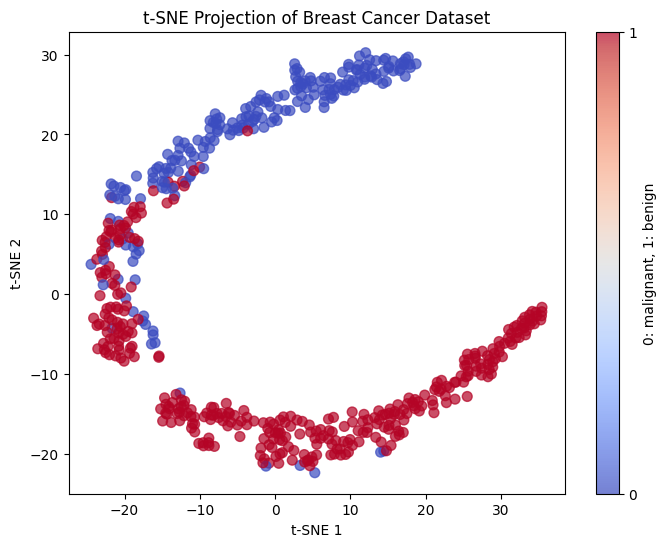

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm', s=50, alpha=0.7)
plt.colorbar(scatter, ticks=[0,1], label='0: malignant, 1: benign')
plt.title("t-SNE Projection of Breast Cancer Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

## ⚙️ Step 4 – Effect of Hyperparameters

t-SNE has two main knobs:  

- **Perplexity**: balance between local vs global structure  
- **Learning rate**: step size in optimization  

👉 Changing these parameters can lead to **different layouts** of the same data.

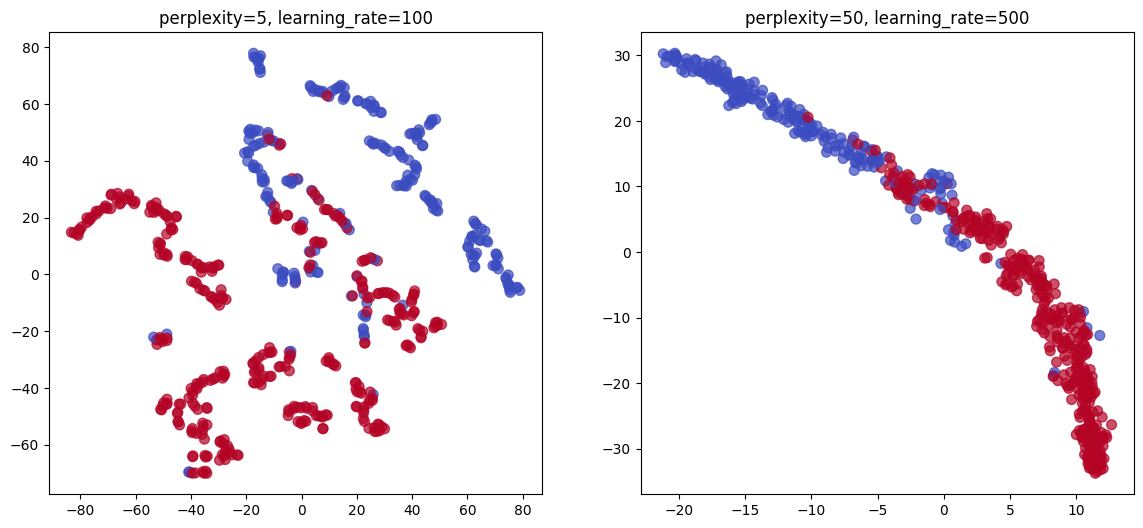

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(14,6))

for ax, params in zip(axs, [(5, 100), (50, 500)]):
    tsne_temp = TSNE(n_components=2, perplexity=params[0], learning_rate=params[1], max_iter=1000, random_state=42)
    X_tsne_temp = tsne_temp.fit_transform(X)
    scatter = ax.scatter(X_tsne_temp[:,0], X_tsne_temp[:,1], c=y, cmap='coolwarm', s=50, alpha=0.7)
    ax.set_title(f"perplexity={params[0]}, learning_rate={params[1]}")
plt.show()

👉 As you change perplexity, the balance between local clusters and global layout shifts.

👉 The learning rate affects how tightly clusters are packed.

---

## Limitations of t-SNE
- Computationally expensive for very large datasets  
- Sensitive to hyperparameters (**perplexity**, **learning rate**)  
- Can sometimes produce different-looking layouts from different runs  
- Distances between clusters are **not meaningful**  

---

## Key Takeaways
✅ t-SNE reveals hidden structures in high-dimensional data.

✅ Works especially well for visual exploration.

✅ Hyperparameters like perplexity and learning rate control local vs global focus.

✅ Complements linear methods like PCA and nonlinear methods like UMAP.

---

## ⚙️ How t-SNE Works (Mathematical Explanation)

t-SNE preserves **pairwise similarities** between points when mapping from high-dimensional space to low-dimensional space.  

---

### 🔹 Step 1 – Start with a Point in High Dimensions
- Dataset: points $\{x_1, x_2, \dots, x_n\}$ in high-dimensional space $\mathbb{R}^D$  
- Choose one point $x_i$  
- Goal: find which points are neighbors of $x_i$  

👉 Think of this as “picking one person in a crowd” and asking: *who are their closest friends?*  

---

### 🔹 Step 2 – Measure Distances
- Compute distances from $x_i$ to others:  

$$
d_{ij} = \|x_i - x_j\|
$$

👉 These distances are raw Euclidean measures. At this stage, distances don’t yet tell us “probabilities,” just how far points are.  

---

### 🔹 Step 3 – Convert Distances into Probabilities
- Similarity of $x_j$ to $x_i$:  

$$
p_{j|i} = \frac{\exp\!\left(-\frac{d_{ij}^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\!\left(-\frac{d_{ik}^2}{2\sigma_i^2}\right)}
$$

- $\sigma_i$ controls how wide the Gaussian neighborhood is  
- Small $\sigma_i$ → few neighbors get high probability  
- Large $\sigma_i$ → many neighbors get moderate probability  

👉 Here we replace “distance” with “probability.” Nearby points get much higher probability under a narrow Gaussian, while far points can still have some influence under a wide Gaussian.  

---

### 🔹 Step 4 – Choose $\sigma_i$ Using Perplexity
- Shannon entropy:  

$$
H(P_i) = - \sum_j p_{j|i} \log_2 p_{j|i}
$$

- Perplexity:  

$$
\text{Perp}(P_i) = 2^{H(P_i)}
$$

- Binary search on $\sigma_i$ until  

$$
\text{Perp}(P_i) \approx \text{desired perplexity}
$$

- Dense regions → smaller $\sigma_i$  
- Sparse regions → larger $\sigma_i$  

👉 Perplexity is like the “effective number of neighbors.” The binary search ensures that each point $x_i$ adapts its neighborhood size depending on whether it lives in a dense or sparse region.  

---

### 🔹 Step 5 – Symmetrize
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

- Ensures $p_{ij} = p_{ji}$  
- Produces global similarity distribution $P = \{p_{ij}\}$  

👉 This step makes the probabilities consistent: the similarity from $i$ to $j$ must equal that from $j$ to $i$.  

---

### 🔹 Step 6 – Define Low-Dimensional Similarities
- Each high-dimensional point $x_i$ is mapped to a low-dimensional point $y_i \in \mathbb{R}^2$ (or $\mathbb{R}^3$).  
- Student-t distribution with 1 d.o.f. (Cauchy):  

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

- Heavy tails spread apart distant points → solves **crowding problem**  

👉 Unlike a Gaussian, the Student-t doesn’t shrink distant points too much. This prevents far-away clusters from collapsing onto each other in low dimensions.  

---

### 🔹 Step 7 – Match Distributions with KL Divergence
$$
C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

- Objective: minimize $C$ so that $Q$ matches $P$  

👉 Think of $P$ as the “true” neighborhood probabilities (from the data), and $Q$ as the “predicted” ones (from the embedding). KL divergence punishes mismatches.  

---

### 🔹 Step 8 – Optimize with Gradient Descent
$$
\frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)\left(1 + \|y_i - y_j\|^2\right)^{-1}
$$

- If $p_{ij} > q_{ij}$: pull $y_i, y_j$ closer  
- If $p_{ij} < q_{ij}$: push them apart  

👉 This is the force-based intuition: too-close points get repelled, too-far points get attracted.  

---

### ✨ Intuition Recap
1. Compute distances → convert to probabilities  
2. Adjust $\sigma_i$ until perplexity ≈ neighborhood size  
3. Symmetrize to get $p_{ij}$  
4. Map $x_i \in \mathbb{R}^D$ to $y_i \in \mathbb{R}^2$  
5. Compute low-d similarities $q_{ij}$ with Student-t  
6. Minimize KL divergence with gradient descent  

👉 Result: clusters emerge in 2D/3D, preserving local neighborhoods  